In [ ]:
import pandas as pd
import numpy as np
andhra = pd.read_csv('Andhra_plfs.csv')
andhra.shape


(14178, 147)

In [ ]:
#andhra =  df[df["state"]==28]

In [ ]:
#andhra.to_csv("Andhra_plfs.csv")

In [ ]:
andhra.columns

Index(['Unnamed: 0', 'file_id_p', 'schedule', 'qtr_p', 'visit_p', 'sector',
       'state', 'district', 'state_region', 'stratum',
       ...
       'cws_monthly_earnings_regsalaried', 'cws_monthly_earnings_selfemp',
       'pid', 't_edu', 'voc_train_received', 'field_voc_train',
       'upa_enterprise_type', 'usa_enterprise_type', 'scode', 'weight'],
      dtype='object', length=147)

In [ ]:
df = andhra[andhra['upa_status']==81]
df.shape

(434, 149)

In [ ]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return sum(val * wt) / wt.sum()

In [ ]:
age = df[df['age']>=15]
age.shape

(5620, 147)

In [ ]:
"""
lfpr1 = age[age['upa_status']<=81]
lfpr2 = age[age['usa_status']<=81]
lfpr3 = age.loc[(age['upa_status'] <=81) & (age['usa_status'] <= 81)]
a=(len(lfpr1)+len(lfpr2)-len(lfpr3))
a

"""

4316

In [ ]:
un = age[(age['upa_status']==81)|(age['usa_status']==81)]
lfpr = age[(age['upa_status']<=81)|(age['usa_status']<=81)]

In [ ]:
female_lfpr= len(lfpr)/len(age)
female_lfpr

0.7679715302491104

In [ ]:
female_uem = len(un)/len(lfpr)
female_uem

0.0705607476635514

In [ ]:
male_lfpr =len(lfpr)/len(age)
male_lfpr

0.7679715302491104

In [ ]:
male_uem = len(un)/len(lfpr)
male_uem

0.06556997219647823

In [ ]:

# codes for social group(ST=1,SC=2,OBC=3,others=9)
sage1 = andhra.loc[(andhra['social_group'] ==1) & (andhra['age'] >=15)]
sage2 = andhra.loc[(andhra['social_group'] ==2) & (andhra['age'] >=15)]
sage3 = andhra.loc[(andhra['social_group'] ==3) & (andhra['age'] >=15)]
sage4 = andhra.loc[(andhra['social_group'] ==9) & (andhra['age'] >=15)]

sem1 = andhra.loc[(andhra['social_group'] ==1) & (andhra['age'] >=15) & (andhra['upa_status']<81)]
sem2 = andhra.loc[(andhra['social_group'] ==2) & (andhra['age'] >=15) & (andhra['upa_status']<81)]
sem3 = andhra.loc[(andhra['social_group'] ==3) & (andhra['age'] >=15) & (andhra['upa_status']<81)]
sem4 = andhra.loc[(andhra['social_group'] ==9) & (andhra['age'] >=15) & (andhra['upa_status']<81)]

sun1 = andhra.loc[(andhra['social_group'] ==1) & (andhra['age'] >=15) & (andhra['upa_status']==81)]
sun2 = andhra.loc[(andhra['social_group'] ==2) & (andhra['age'] >=15) & (andhra['upa_status']==81)]
sun3 = andhra.loc[(andhra['social_group'] ==3) & (andhra['age'] >=15) & (andhra['upa_status']==81)]
sun4 = andhra.loc[(andhra['social_group'] ==9) & (andhra['age'] >=15) & (andhra['upa_status']==81)]

sl1 = andhra.loc[(andhra['social_group'] ==1) & (andhra['age'] >=15) & (andhra['upa_status']<=81)]
sl2 = andhra.loc[(andhra['social_group'] ==2) & (andhra['age'] >=15) & (andhra['upa_status']<=81)]
sl3 = andhra.loc[(andhra['social_group'] ==3) & (andhra['age'] >=15) & (andhra['upa_status']<=81)]
sl4 = andhra.loc[(andhra['social_group'] ==9) & (andhra['age'] >=15) & (andhra['upa_status']<=81)]

In [ ]:
ST_WPR = len(sem1)/len(sage1)
SC_WPR = len(sem2)/len(sage2)
OBC_WPR = len(sem3)/len(sage3)
OTH_WPR = len(sem4)/len(sage4)

In [ ]:
WPRs = [ST_WPR,SC_WPR,OBC_WPR,OTH_WPR]
WPRs

[0.6152304609218436,
 0.5479511769834351,
 0.5380116959064327,
 0.4663633409164771]

In [ ]:
ST_UNR = len(sun1)/len(sl1)
SC_UNR = len(sun2)/len(sl2)
OBC_UNR = len(sun3)/len(sl3)
OTH_UNR = len(sun4)/len(sl4)

In [ ]:
len(sun4)

100

In [ ]:
UNs = [ST_UNR,SC_UNR,OBC_UNR,OTH_UNR]
UNs

[0.07807807807807808,
 0.07095343680709534,
 0.06717363751584284,
 0.06514657980456026]

In [ ]:
def edu_cate(value):
  if value<=4:
    return "no education"
  elif value>4 and value<=8:
    return 'low education'
  elif value>8 and value<=11:
    return 'medium education'
  else:
    return 'high education'





In [ ]:
andhra['edu_level'] = andhra['g_edu'].apply(edu_cate)

In [ ]:
age = andhra[andhra['age']>=15]
age.shape

(11342, 149)

In [ ]:
age[age['edu_level']=='high education'].shape

(1517, 149)

In [ ]:
andhra.to_csv('edu_bin andhra1.csv')

In [ ]:
eun1 = andhra.loc[(andhra['age'] >=15) & (andhra['upa_status'] ==81) & (andhra['edu_level']=="no education")]
eun1.shape

(1, 149)

In [ ]:
eun1 = andhra.loc[(andhra['edu level'] =="no education") & (andhra['age'] >=15) & (andhra['upa_status']==81)]
eun2 = andhra.loc[(andhra['edu level'] =="low education") & (andhra['age'] >=15) & (andhra['upa_status']==81)]
eun3 = andhra.loc[(andhra['edu level'] =="medium education") & (andhra['age'] >=15) & (andhra['upa_status']==81)]
eun4 = andhra.loc[(andhra['edu level'] =="high education") & (andhra['age'] >=15) & (andhra['upa_status']==81)]

el1 = andhra.loc[(andhra['edu level'] =="no education") & (andhra['age'] >=15) & (andhra['upa_status']<=81)]
el2 = andhra.loc[(andhra['edu level'] =="low education") & (andhra['age'] >=15) & (andhra['upa_status']<=81)]
el3 = andhra.loc[(andhra['edu level'] =="medium education") & (andhra['age'] >=15) & (andhra['upa_status']<=81)]
el4 = andhra.loc[(andhra['edu level'] =="high education") & (andhra['age'] >=15) & (andhra['upa_status']<=81)]

In [ ]:
UNn = len(eun1)/len(el1)
UNl = len(eun2)/len(el2)
UNm = len(eun3)/len(el3)
UNh= len(eun4)/len(el4)
UNR_EDU_LEVEL = [UNn,UNl,UNm,UNh]
UNR_EDU_LEVEL

[0.0005356186395286556,
 0.015913200723327307,
 0.1513353115727003,
 0.2679738562091503]

In [ ]:
andhra['edu level']

0        medium education
1           low education
2            no education
3            no education
4            no education
               ...       
14173        no education
14174       low education
14175       low education
14176       low education
14177        no education
Name: edu level, Length: 14178, dtype: object

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
edu_dict = {"edu_level":["No Education","Low Education","Medium education","High education"],"Unr":[0.003,1.261,15.447,26.066]}

In [ ]:
df = pd.DataFrame(edu_dict)
w = 0.3

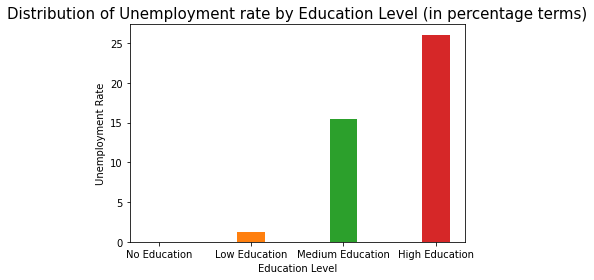

In [ ]:
plt.bar("No Education",0.003,w)
plt.bar("Low Education",1.261,w)
plt.bar("Medium Education",15.447,w)
plt.bar("High Education",26.066,w)
#plt.pie(GEN_OBC,SC,ST)



plt.xlabel("Education Level")
plt.ylabel("Unemployment Rate")
plt.title("Distribution of Unemployment rate by Education Level (in percentage terms)",fontdict={'fontsize': 15})
#plt.legend()
plt.show()

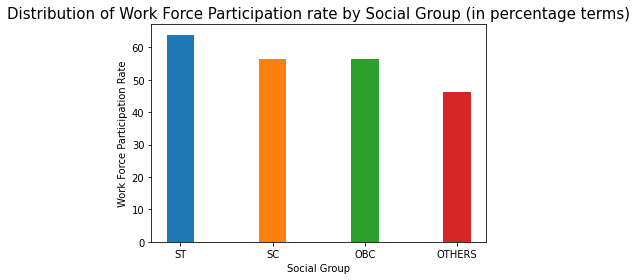

In [ ]:
# Distribution of wpr by caste
plt.bar("ST",63.922,w)
plt.bar("SC",56.397,w)
plt.bar("OBC",56.316,w)
plt.bar("OTHERS",46.267,w)
#plt.pie(GEN_OBC,SC,ST)



plt.xlabel("Social Group")
plt.ylabel("Work Force Participation Rate")
plt.title("Distribution of Work Force Participation rate by Social Group (in percentage terms)",fontdict={'fontsize': 15})
#plt.legend()
plt.show()

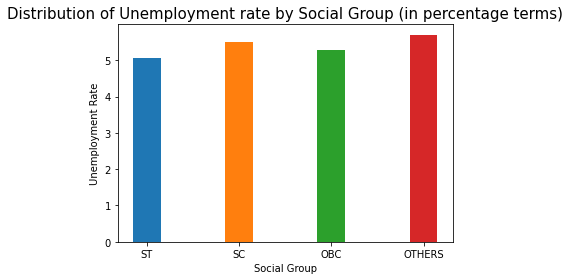

In [ ]:
plt.bar("ST",5.052,w)
plt.bar("SC",5.490,w)
plt.bar("OBC",5.288,w)
plt.bar("OTHERS",5.701,w)
#plt.pie(GEN_OBC,SC,ST)



plt.xlabel("Social Group")
plt.ylabel("Unemployment Rate")
plt.title("Distribution of Unemployment rate by Social Group (in percentage terms)",fontdict={'fontsize': 15})
#plt.legend()
plt.show()

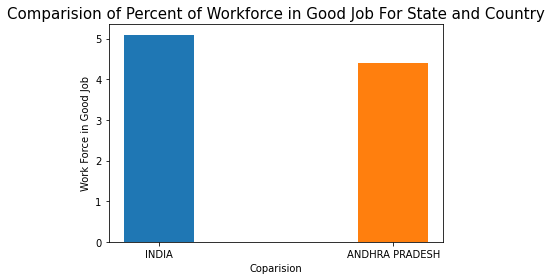

In [ ]:
# Good job comparision to country
plt.bar("INDIA",5.096,w)
plt.bar("ANDHRA PRADESH",4.410,w)
#plt.bar("Medium Education",15.447,w)
#plt.bar("High Education",26.066,w)
#plt.pie(GEN_OBC,SC,ST)



plt.xlabel("Coparision")
plt.ylabel("Work Force in Good Job")
plt.title("Comparision of Percent of Workforce in Good Job For State and Country",fontdict={'fontsize': 15})
#plt.legend()
plt.show()

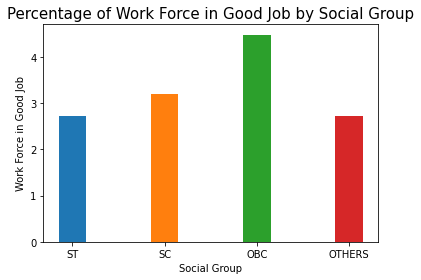

In [ ]:
# Good Job By Catogory
plt.bar("ST",2.720,w)
plt.bar("SC",3.203,w)
plt.bar("OBC",4.480,w)
plt.bar("OTHERS",2.724,w)
#plt.pie(GEN_OBC,SC,ST)



plt.xlabel("Social Group")
plt.ylabel("Work Force in Good Job")
plt.title("Percentage of Work Force in Good Job by Social Group",fontdict={'fontsize': 15})
#plt.legend()
plt.show()

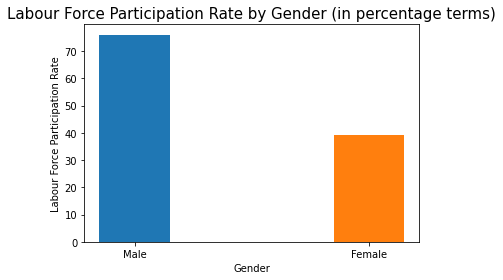

In [ ]:
#lfpr by gender
plt.bar("Male",75.98,w)
plt.bar("Female",39.32,w)
#plt.bar("Medium Education",15.447,w)
#plt.bar("High Education",26.066,w)
#plt.pie(GEN_OBC,SC,ST)



plt.xlabel("Gender")
plt.ylabel("Labour Force Participation Rate")
plt.title("Labour Force Participation Rate by Gender (in percentage terms)",fontdict={'fontsize': 15})
#plt.legend()
plt.show()

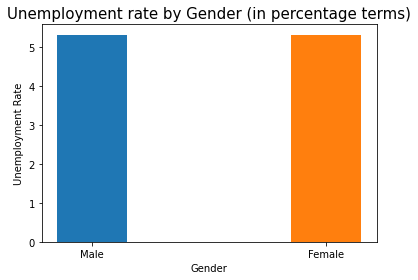

In [ ]:
# Unemployment rate by gender
plt.bar("Male",5.31,w)
plt.bar("Female",5.32,w)
#plt.bar("Medium Education",15.447,w)
#plt.bar("High Education",26.066,w)
#plt.pie(GEN_OBC,SC,ST)



plt.xlabel("Gender")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment rate by Gender (in percentage terms)",fontdict={'fontsize': 15})
#plt.legend()
plt.show()

In [ ]:
dict1 = {"Social Group":['ST','SC','OBC','OTHERS'],'Self Employed':[26.77,19.20,30.45,34.99],'Employer':[0.56,1.61,1.76,4.28],'House Hold Enterprise':[17.44,5.21,12.89,12.64],'Salaried/Wage Labour':[12.18,21.80,22.92,28.56],'Casual Wage Labour':[0.51,0.51,1.17,0.31],'Other types of Work':[42.53,51.65,30.80,19.21]}

In [ ]:
df = pd.DataFrame(dict1)
df

,Social Group,Self Employed,Employer,House Hold Enterprise,Salaried/Wage Labour,Casual Wage Labour,Other types of Work
0,ST,26.77,0.56,17.44,12.18,0.51,42.53
1,SC,19.20,1.61,5.21,21.80,0.51,51.65
2,OBC,30.45,1.76,12.89,22.92,1.17,30.80
3,OTHERS,34.99,4.28,12.64,28.56,0.31,19.21


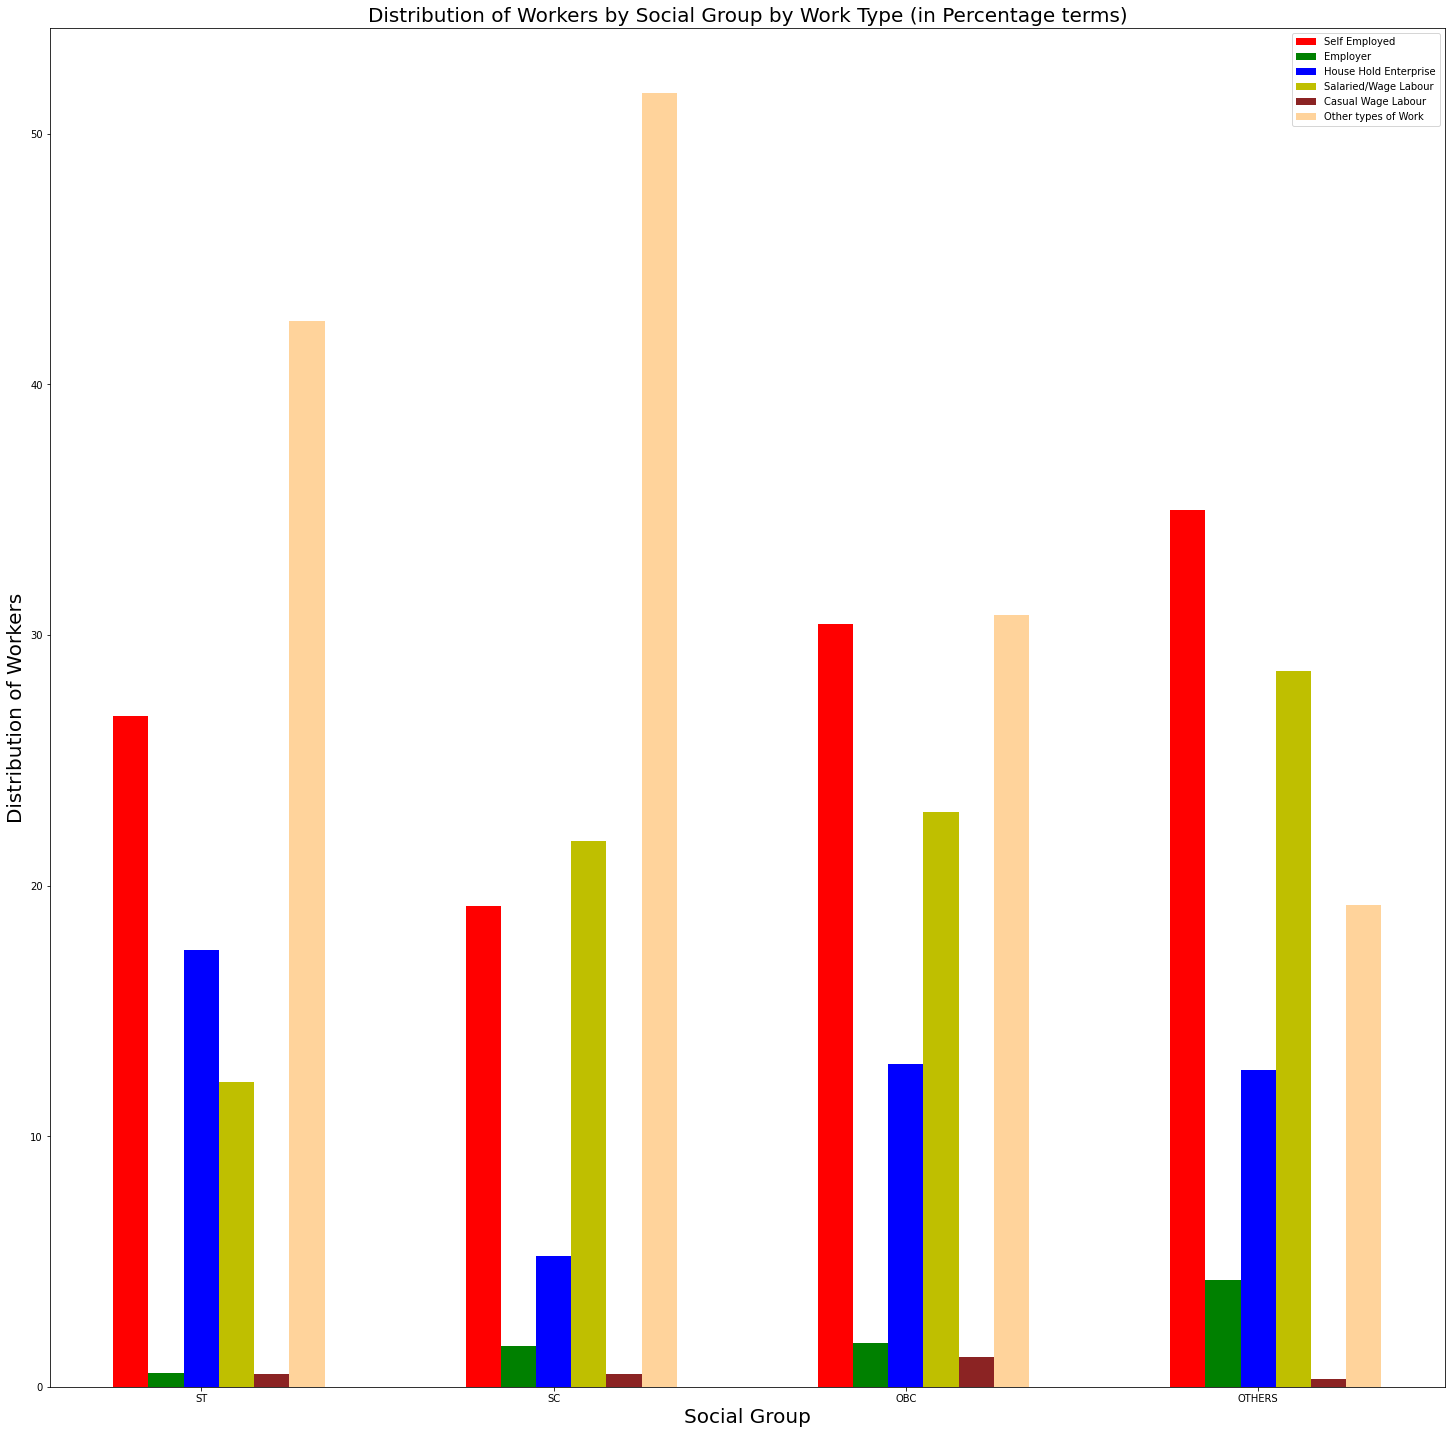

In [ ]:
x=df["Social Group"]
y1=df["Self Employed"]
y2=df["Employer"]
y3 = df["House Hold Enterprise"]
y4 = df['Salaried/Wage Labour']
y5= df['Casual Wage Labour']
y6 = df['Other types of Work']
width = 0.1
bar1=np.arange(len(x))
bar2 = [i+width for i in bar1]
bar3 = [i+width for i in bar2]
bar4 = [i+width for i in bar3]
bar5 = [i+width for i in bar4]
bar6 = [i+width for i in bar5]


fig = plt.figure(figsize = (25,25))
plt.bar(bar1,y1,width,color="r",label="Self Employed")
plt.bar(bar2,y2,width,color='g',label="Employer")
plt.bar(bar3,y3,width,color='b',label= "House Hold Enterprise")
plt.bar(bar4,y4,width,color='y',label='Salaried/Wage Labour')
plt.bar(bar5,y5,width,color='#8B2323',label='Casual Wage Labour')
plt.bar(bar6,y6,width,color='#FFD39B',label='Other types of Work')
plt.xticks(bar1+(width*2),x)
plt.xlabel("Social Group",fontdict={'fontsize': 20})
plt.ylabel("Distribution of Workers",fontdict={'fontsize': 20})
plt.title('Distribution of Workers by Social Group by Work Type (in Percentage terms)',fontdict={'fontsize': 20})
#plt.bar("Gender","iterate",data = Literacy_By_Gender,color="red")
plt.legend()
plt.show()